# FAQ Collections

## Description

There exist many websites containing FAQ pages where we can find QA pairs.

We would like to collect high-quality QA pairs from these websites.

In this project, we limit the language of QA pairs to either English, Chinese or Japanese.

![Image of FAQ](https://www.redmineup.com/cms/assets/thumbnail//33165/800/faq.png)

Below are the requirements:

In [ ]:
# Example locations of websites

countries = [
    'China',
    'English-speaking countries',
    'Hong Kong',
    'Taiwan',
]

# Languages

langs = [
    'en',
    'cn',
    'zh-HK',
    'zh-TW',
    'ja'    # 順手就要埋
]


# Example types of websites

types = [
    'airlines',
    'banks',
    'ecommerce/shops',
    'campaigns/competitions',
    'games',
    'college/schools',
    'restaurants',
    'shopping malls',
    'help center',
    'handbook',
]

# Example websites

urls = [
    'http://commoncrawl.org/big-picture/frequently-asked-questions/',
    'https://norwegian.custhelp.com/app/answers/list',
    'https://www.linkreit.com/tc/faq/',
    'https://alumni.cuhk.edu.hk/en/frequently-asked-questions',
    'https://www.asiamiles.com/zh/support/help-centre/faq.html#/redeem/flight/general',
    'https://www.blackbirdguitar.com/pages/faqs',
    'https://www2.hm.com/zh_asia1/customer-service/product-and-quality/quality.html',
    'https://www.travelclassroom.net/2011/08/rakuten-market-faq.html',
    'https://healthtaphelp.zendesk.com/hc/en-us'
]

## Output Format

- Extension: json

- Schema:

```json
{
    'website': 'CUHK Alumni Affairs Office', // Same for each website
    'name'   : 'CUHK Alumni Affairs Office', // 香港中文大學校友事務處 if "lang" is "zh"
    'desc'   : '<p>Established in 1982, the Alumni Affairs Office (AAO) is committed to developing a connected alumni community and promoting alumni\'s sense of belongings to their alma mater. Our missions are:</p>'
    'url'    : 'https://alumni.cuhk.edu.hk/en/frequently-asked-questions',
    'lang'   : 'en',
    'items'  : [
        {
            'q': 'When would CU graduates become CU alumni?',  //  Text Only
            'a': 'Once their graduate status is confirm ...',  //  Text / HTML
        }
    
    
    ]

}

```

- For `'desc'`, you can just copy from the **About Us** page as *string* and save to the field.

```html
<p>Established in 1982, the Alumni Affairs Office (AAO) is committed to developing a connected alumni community and promoting alumni's sense of belongings to their alma mater. Our missions are:</p>
<ul>
	<li style="z-index: 500;">To draw alumni support on the cause of the University;</li>
	<li style="z-index: 490;">To engage alumni to contribute to the University in various capacities;</li>
	<li style="z-index: 480;">To facilitate alumni to serve as ambassadors of their alumni mater in order to help promote good relations between the University and the general public, and</li>
	<li style="z-index: 470;">To draw alumni input in matters relating to the development of the University</li>
</ul>
```




## Tools


### 1. **Copy & Pase**

    - Useful when there are only few QA pairs
    - Text only 
    


### 2. Python + Beautiful Soup (Single page)

    - Useful when there are only few QA pairs
    - Text only 
    

#### Example
- https://mitsui-shopping-park.com/lalaport/shinmisato/tw/faq/
- https://mitsui-shopping-park.com/lalaport/shinmisato/en/faq/

In [52]:
from HTMLSchemaParser import fetch_url, HTMLSchemaParser
import urllib.parse
from bs4 import BeautifulSoup as bs4
from tqdm import tqdm
from datetime import datetime, timedelta
import re, json
from tqdm import tqdm

import os
def makesure_dir(filename):
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

makesure_dir('data/temp')

In [64]:


docs = []
lang_mapping = {
    'en': 'en',
    'tw': 'zh-TW',
}
name_mapping = {
    'en': 'Mitsui Fudosan Retail Management Co., Ltd.',   # Copy from the bottom of the website
    'tw': '三井不動產',                                # I just googled it
    
}
desc_mapping = {
    'en': """Located directly in front of the Musashino Line Shinmisato Station.
This mall has 180 attractive shops that stimulate the desire to shop and dine. Ikea and COSTCO are located next door.
The shopping mall includes the drugstore MatsumotoKiyoshi, Uniqlo and other casual fashion stores, Akachan Honpo's full lineup of baby goods, Edion's home electronics, and restaurants where you can enjoy a wide variety of Japanese dishes, such as taiyaki and takoyaki.""",
    'tw': '''從武藏野線「新三鄉站」出站即能立刻抵達位於站前的本商場。
本商場鄰接「IKEA」、「COSTCO」，購物中心內匯集了「松本清」藥妝店、「UNIQLO」等休閒時尚品牌、嬰幼兒商品琳瑯滿目的「阿卡將本舖」、販售家電產品的「EDION」，以及可品嚐日式料理、鯛魚燒與章魚燒等各式日本美食的餐廳等等，多達180間的魅力商店，可激發顧客購物及享受美食的慾望。''',
}

In [65]:


for lang in lang_mapping:
    url = 'https://mitsui-shopping-park.com/lalaport/shinmisato/%s/faq/'%lang
    html = fetch_url(url)
    soup = bs4(html)
    result = []
    for block in soup.select('.blockTypeA'):
        q = block.select('h2')[0]
        a = block.select('p')[0]

        q = re.sub(r'Q\d+: ', '', q.text.strip())
        a = re.sub(r'A: ', '', a.text.strip())
        result.append({
            'q': q,
            'a': a,
        })
        
    doc = {
        'website': 'Mitsui Fudosan Retail Management Co., Ltd.', # Copy from the bottom of the website
        'name'   : name_mapping[lang], # Copy from the bottom of the website
        'desc'   : desc_mapping[lang],
        'url'    : url,
        'lang'   : lang_mapping[lang],
        'items'  : result

    }
    docs.append(doc)
len(docs)

2

In [66]:
docs

[{'desc': '從武藏野線「新三鄉站」出站即能立刻抵達位於站前的本商場。\n本商場鄰接「IKEA」、「COSTCO」，購物中心內匯集了「松本清」藥妝店、「UNIQLO」等休閒時尚品牌、嬰幼兒商品琳瑯滿目的「阿卡將本舖」、販售家電產品的「EDION」，以及可品嚐日式料理、鯛魚燒與章魚燒等各式日本美食的餐廳等等，多達180間的魅力商店，可激發顧客購物及享受美食的慾望。',
  'items': [{'a': '可以。有數間商店接受銀聯卡，但無法使用於所有店家。', 'q': '可以使用銀聯卡嗎？'},
   {'a': '本商場無提供換錢服務。', 'q': '哪裡可以換錢？'},
   {'a': '非常抱歉，本商場只有日語服務人員。', 'q': '有通曉日語以外語言的服務人員嗎？'},
   {'a': '可以。本商場接受全球主要信用卡，刷卡前請先向各店家洽詢。', 'q': '可以使用信用卡嗎？'},
   {'a': '可以。服務台提供免費租借嬰兒車之服務。', 'q': '可以租借嬰兒車嗎？'},
   {'a': '在部分商店購物可免稅，詳情請向店家洽詢。', 'q': '購物可以免稅嗎？'},
   {'a': '有的，1樓有松本清藥妝店。', 'q': '商場內有藥妝店嗎？'},
   {'a': '有上下車場地，但無法停放車輛。', 'q': '有可供大型巴士上下車的場地嗎？'},
   {'a': '有的，UNIQLO位於2樓。', 'q': '商場內有UNIQLO嗎？'}],
  'lang': 'zh-TW',
  'name': '三井不動產',
  'url': 'https://mitsui-shopping-park.com/lalaport/shinmisato/tw/faq/',
  'website': 'Mitsui Fudosan Retail Management Co., Ltd.'},
 {'desc': "Located directly in front of the Musashino Line Shinmisato Station.\nThis mall has 180 attractive shops that stimulate the desire to shop and dine. Ikea and

In [67]:
with open('data/mitsui-shopping-park.json','w') as f:
    json.dump(docs,f)

In [68]:
count = 0
for doc in docs:
    for e in doc['items']:
        count += 1
count

18

In [69]:
count = sum(1 for doc in docs for e in doc['items'])
count

18

#### Another Example

- https://www.cpr.cuhk.edu.hk/cong/page/9

- I found that there are other pages of FAQ, but the questions are just the same...

In [57]:

lang_mapping = {
    'en': 'en',
    'zh_tw': 'zh-TW',
}
name_mapping = {
    'en': 'CUHK Communication and Public Relations Office Congregation',   # Copy from somewhere in the website HTML
    'zh_tw': '香港中文大學傳訊及公共關係處  頒授學位典禮',      # I just typed it
    
}
desc_mapping = {
    'en': "",
    'zh_tw': '',
}
docs = []

def parent_util_tag(e,tag='p'):
    while e.parent.name != 'p':
        e = e.parent
    return e.parent

for lang in lang_mapping:
    url = 'https://www.cpr.cuhk.edu.hk/cong/page/9?lang=%s'%lang
    html = fetch_url(url)

    soup = bs4(html)
    result = []
    questions = soup.select('[name^="q"]')
    answers = soup.select('.page_content [style="padding-left: 30px;"]')


    questions = [parent_util_tag(e).text.strip() for e in questions]
    answers = [str(e).strip() for e in answers if e.text.strip()]  # str(e) = outerHTML     e.decode_contents() = innerHTML

    assert len(answers) == len(questions), (len(answers), len(questions))
    result = [{'q':q,'a':a } for q, a in zip(questions, answers)]
    result
    
    
    doc = {
        'website': 'CUHK Communication and Public Relations Office Congregation',
        'name'   : name_mapping[lang],   
        'desc'   : desc_mapping[lang],
        'url'    : url,
        'lang'   : lang_mapping[lang],
        'items'  : result

    }
    docs.append(doc)
len(docs)

2

In [58]:
# Below is testing

url = 'https://www.cpr.cuhk.edu.hk/cong/page/9?lang=%s'%lang
html = fetch_url(url)

In [59]:

soup = bs4(html)
result = []
questions = soup.select('[name^="q"]')
answers = soup.select('.page_content [style="padding-left: 30px;"]')


questions = [parent_util_tag(e).text.strip() for e in questions]
answers = [str(e).strip() for e in answers if e.text.strip()]  # str(e) = outerHTML     e.decode_contents() = innerHTML

assert len(answers) == len(questions), (len(answers), len(questions))
result = [{'q':q,'a':a }for q, a in zip(questions, answers)]
result

[{'a': '<p style="padding-left: 30px;">畢業生需以其香港身份證號碼作為登入系統的密碼。沒有香港身份證的畢業生，可致電 3943-8899請求協助。</p>',
  'q': '我為何不能登入畢業典禮的網上登記系統?'},
 {'a': '<p style="padding-left: 30px;">頒授學位典禮一般在上午10時開始，約於上午11時完結；而書院畢業典禮一般需時約1.5至2.5個小時。</p>',
  'q': '頒授學位典禮及書院畢業典禮約需時多久？'},
 {'a': '<p style="padding-left: 30px;">不會。畢業生可於典禮後到指定地點領取畢業證書。詳情請參閱<a href="/cong/page/6">領取畢業證書</a>。</p>',
  'q': '我會否於畢業典禮時獲頒畢業證書?'},
 {'a': '<p style="padding-left: 30px;">可以。如欲於頒授學位典禮後租用畢業學袍，請與商務組聯絡（電話：3943-4733；電郵：<span style="font-family: 新細明體; color: #000000;"><a href="mailto:gown@cuhk.edu.hk">gown@cuhk.edu.hk</a></span>）。</p>',
  'q': '我不會出席任何畢業典禮，可否租用畢業學袍？'},
 {'a': '<p style="padding-left: 30px;">請<a href="/cong/page/31#bachelor_proper_way">按此</a>參考正確穿著方法。</p>',
  'q': '怎樣才是正確穿著畢業學袍的方法?'},
 {'a': '<p style="padding-left: 30px;">你可參加其中一個或兩個典禮。於頒授學位典禮中，全體畢業生會在台下肅立，集體領受學位（即不需登上禮台）；而於書院畢業典禮中，畢業生將獲個別介紹步上禮台。</p>',
  'q': '我是學士學位畢業生，是否可參加頒授學位典禮或書院畢業典禮?'},
 {'a': '<p style="padding-left: 30px;">不可以。</p>',
  'q': '今年我未能出席畢業禮，可否於明年補行

In [60]:
docs

[{'desc': '',
  'items': [{'a': '<p style="padding-left: 30px;">All graduates can log in to the system by using your Hong Kong Identity Card number as password. If you don\'t have a Hong Kong Identity Card, please call 3943-8899 for help.</p>',
    'q': "Why can't I log in to the online registration system?"},
   {'a': '<p style="padding-left: 30px;">The Congregation usually starts at 10:00 am and is expected to end at around 11:00 am; and the College Graduation Ceremony usually lasts for about 1.5 to 2.5 hours.</p>',
    'q': 'How long will the Congregation and the College Graduation Ceremony last?'},
   {'a': '<p style="padding-left: 30px;">No. The certificate will be available for collection after the Congregation. Please refer to <a href="/cong/page/6">Collection of Certificate</a> for details.</p>',
    'q': 'Will I be presented with the degree certificate during the ceremony?'},
   {'a': '<p style="padding-left: 30px;">Yes, graduates who are not attending any of the graduation ce

In [11]:
with open('data/cpr-cuhk-cong.json','w') as f:
    json.dump(docs,f)

In [61]:
count = sum(1 for doc in docs for e in doc['items'])
count

22



### 3. Chrome + F12 + Javascript

    - Useful when there are many QA pairs in one page
    - Need HTML
      e.g. https://alumni.cuhk.edu.hk/en/frequently-asked-questions

    1. Select an element
    2. Use css selector to select desired elements
    3. Run `copy(items)`
    4. Paste into Jupyter Notebook and play with it.
    

#### Example

- url: https://alumni.cuhk.edu.hk/en/frequently-asked-questions


1. `F12` to open `Console > Elements`


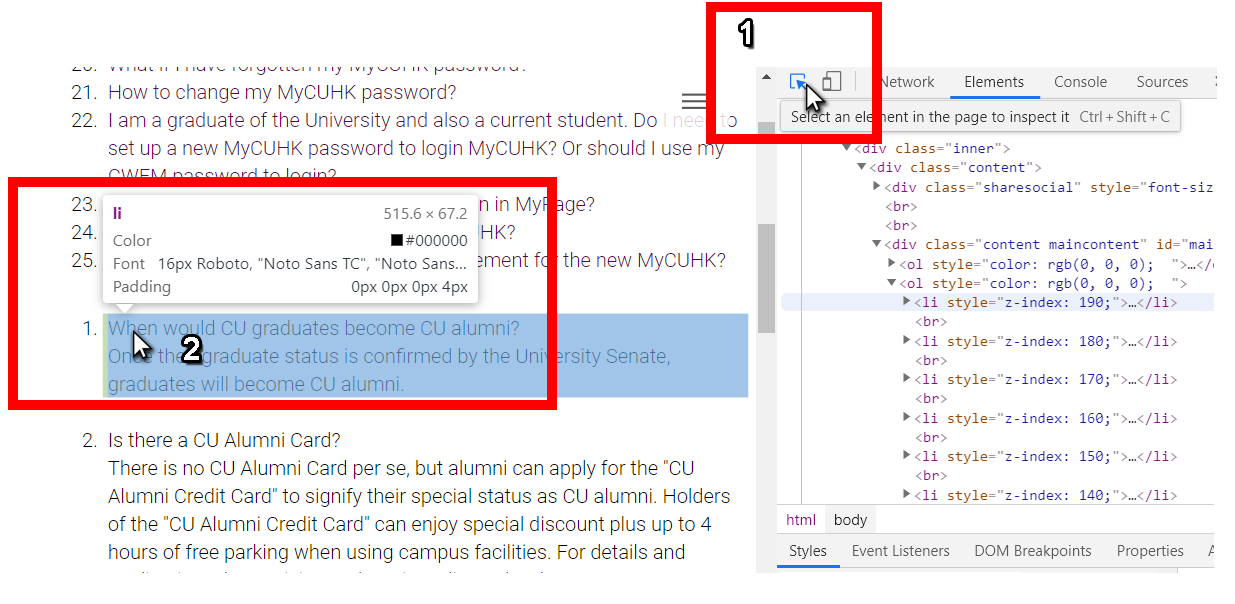



2. Observe that All QA pairs in `<ol style="color: rgb(0, 0, 0);  ">`


```html
<section class="page">
  <div class="inner">
    <div class="content">
      <div class="sharesocial" style="font-size: 23px;">
      <br>
      <br>

      <div class="content maincontent" id="maincontent">
        <ol style="color: rgb(0, 0, 0);  ">
          <li style="z-index: 460;">
            <a href="#01" style="color: rgb(0, 150, 201);">When would CU graduates become CU alumni?</a></li>
            ...

```

3. Right Click on `<ol style="color: rgb(0, 0, 0);  ">`


4. Edit as HTML, select & copy


5. Paste below

In [30]:
html = '''<ol style="color: rgb(0, 0, 0);  ">
	<li style="z-index: 190;"><a name="01" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>When would CU graduates become CU alumni?<br>
	Once their graduate status is confirmed by the University Senate, graduates will become CU alumni.</li>
	<br>
	<li style="z-index: 180;"><a name="02" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>Is there a CU Alumni Card?<br>
	There is no CU Alumni Card per se, but alumni can apply for the "CU Alumni Credit Card" to signify their special status as CU alumni. Holders of the "CU Alumni Credit Card" can enjoy special discount plus up to 4 hours of free parking when using campus facilities. For details and application, please visit <a href="cu-alumni-credit-card" style="color: rgb(0, 150, 201);" target="_blank">CU Alumni Credit Card webpage</a>.</li>
	<br>
	<li style="z-index: 170;"><a name="03" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What benefits and services could CU alumni enjoy? Can alumni use campus facilities?<br>
	As a CU graduate, you can enjoy to a lot of benefits and services. CU alumni are welcome to return to campus to use the following facilities: libraries, swimming pool, selected sports facilities and CU Staff Common Room Restaurant etc. Please visit <a href="campus-facilities-and-services" style="color: rgb(0, 150, 201);" target="_blank">Alumni Benefits webpage</a> for details. Holders of the CU Alumni Credit Card can enjoy special discount plus up to 4 hours of free parking when using the facilities.</li>
	<br>
	<li style="z-index: 160;"><a name="04" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>May I use CU library service?<br>
	All CUHK graduates are eligible to apply for the "Alumni Library Card" (Borrower's Card or Reader's Card) which allows them access to any library of the University Library System. They may also apply for the "Digital Library Service for Alumni". For application fee, procedure and details, please visit the <a href="http://www.lib.cuhk.edu.hk/en" style="color: rgb(0, 150, 201);" target="_blank">Library webpage</a>. For application, please log on to the <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> portal to apply.</li>
	<br>
	<li style="z-index: 150;"><a name="05" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>I have already completed all the required courses. Am I a "graduate" of the University? Can I apply for the alumni library services?<br>
	Once the graduation status of CUHK students has been approved by the Senate of the University, the students are considered as graduates of the University and may apply for the alumni library services through <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>. For undergraduates, normally, the graduation list of the year will be confirmed by the Senate in mid-March (for first term graduates) or mid-August (for second term graduates). For postgraduate students, the graduation list will be approved by the Senate in batches throughout the year. Students may check with the Registration and Examinations Section of the Registry the status if necessary (email: <a href="mailto:ugadmin@cuhk.edu.hk" style="color: rgb(0, 150, 201);">ugadmin@cuhk.edu.hk</a> ) OR check with the Graduate School Office (email: <a href="mailto:gradschool@cuhk.edu.hk" style="color: rgb(0, 150, 201);">gradschool@cuhk.edu.hk</a>).</li>
	<br>
	<li style="z-index: 140;"><a name="06" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What are the alumni bodies which alumni can join?<br>
	All degree graduates will automatically become members of the "CUHK Convocation". For the objectives and activities of the "CUHK Convocation", please visit the <a href="http://www.alumni.cuhk.edu.hk/convocation/eng/" style="color: rgb(0, 150, 201);" target="_blank">CUHK Convocation webpage</a>.<br>
	To enhance the connection among alumni of different Colleges and Schools, the Federation of Alumni Associations of CUHK (FAA) is set up consisting of the Alumni Associations of Chung Chi College, New Asia College, United College, Shaw College and School of Education, etc. as basic members and the Alumni Association of Part-time Degree Programme as an affiliate member. Members of any of the above Alumni Associations are also the members of FAA. Please visit <a href="http://www.alumni.cuhk.edu.hk/faa/" style="color: rgb(0, 150, 201);" target="_blank">FAA webpage</a> for further details.<br>
	Currently, there are over 100 CU alumni associations established in Hong Kong, China and other parts of the world. They are organized by college, major, profession or interest which together form a CUHK alumni network worldwide.<br>
	New alumni are most welcome to join the alumni associations of their interest and take part in their activities. Through participation in these alumni bodies, you will not only be able to maintain your linkage with fellow classmates and alumni, but also expand your personal network which will in turn benefit your further development in life. Please visit <a href="associations" style="color: rgb(0, 150, 201);" target="_blank">Alumni Organization webpage</a> for details.</li>
	<br>
	<li style="z-index: 130;"><a name="07" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>I am going to live / work / study abroad, how can I know if there is any alumni association with which I can get in touch?<br>
	For names and contact officers of all CU alumni associations around the world, please visit <a href="associations/region/offshore" style="color: rgb(0, 150, 201);" target="_blank">Alumni Organization webpage</a>.</li>
	<br>
	<li style="z-index: 120;"><a name="08" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>How to get a free lifetime Alumni Email Forwarding Address?<br>
	Please visit <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> for details and sign up for the free and convenient service.</li>
	<br>
	<li style="z-index: 110;"><a name="09" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>Why should I inform Alumni Affairs Office of my email and mailing address?<br>
	No matter where you are, with your email and mailing address, Alumni Affairs Office can send you the latest copy of "CU Alumni" magazine and alumni e-newsletter "Alumni Matters", and keep you informed of the latest news and activities of all CU alumni associations and the University.<br>
	Do let us know by updating your personal information through <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>.</li>
	<br>
	<li style="z-index: 100;"><a name="10" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>How can I get a transcript?<br>
	For graduates of undergraduate programme, please visit:<br>
	<a href="http://www.res.cuhk.edu.hk/en-gb/applications/graduates-of-full-time-undergraduate-programmes" style="color: rgb(0, 150, 201);" target="_blank">http://www.res.cuhk.edu.hk/en-gb/applications/graduates-of-full-time-undergraduate-programmes</a><br>
	For graduates of postgraduate programme, please visit:<br>
	<a href="https://www.gs.cuhk.edu.hk/page/RequestOfficialDocuments" style="color: rgb(0, 150, 201);" target="_blank">https://www.gs.cuhk.edu.hk/page/RequestOfficialDocuments</a></li>
	<br>
	<li style="z-index: 90;"><a name="11" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>How can I share my news with alumni?<br>
	You are welcome to contribute news to "CU Alumni" magazine.</li>
	<br>
	<li style="z-index: 80;"><a name="12" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>How can I make a gift to CU?<br>
	Thank you for your consideration of making a gift to your alma mater. Alumni may make your donation <a href="https://cloud.itsc.cuhk.edu.hk/forms/forms/35.aspx" style="color: rgb(0, 150, 201);" target="_blank">online</a> or complete and return the <a href="http://alumni.cuhk.edu.hk/assets/media/donation.pdf" style="color: rgb(0, 150, 201);" target="_blank">donation form</a> to show that you CARE!</li>
	<br>
	<li style="z-index: 70;"><a name="13" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What is <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>? What kind of services does it provide?<br>
	<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> is an online platform for alumni, staff and students to access campus news and a wide range of online services include updating personal contact details, submitting online service applications and registering for University's alumni events.<br>
	Please visit the <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> for details and log in.</li>
	<br>
	<li style="z-index: 60;"><a name="14" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What are required to login <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>?<br>
	Alumni are required to login <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> with their Alumni ID and the <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> password.</li>
	<br>
	<li style="z-index: 50;"><a name="15" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What is Alumni ID?<br>
	Beginning from October 2010, every alumnus of the University has been assigned with a 10-digit Alumni ID which is an important identification number and will be widely used in online systems of the University requiring authentication, including the <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> online platform. When a CUHK graduate pursues another degree at the University, his/her Alumni ID will also serve as his/her Student ID. Alumni who graduated after October 2010 should use their 10-digit student ID as their Alumni ID.</li>
	<br>
	<li style="z-index: 40;"><a name="16" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>How can I get my Alumni ID?<br>
	You can acquire the number from the <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> website (please <a href="http://www.alumni.cuhk.edu.hk/MyCUHK/InquireAlumniID.html" style="color: rgb(0, 150, 201);" target="_blank">visit here</a> for more details).</li>
	<br>
	<li style="z-index: 30;"><a name="17" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>How do I retrieve my Alumni ID if I have lost it?<br>
	Please visit <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> and input your HKID number and graduation information in the front page of the MyCUHK platform to acquire your lost/ forgotten Alumni ID (please <a href="http://www.alumni.cuhk.edu.hk/MyCUHK/InquireAlumniID.html" style="color: rgb(0, 150, 201);" target="_blank">visit here</a> for more details). In case your HKID information is not available for the request to be processed automatically, please contact the Alumni Affairs Office ( <a href="mailto:mycuhk_alumni@cuhk.edu.hk" style="color: rgb(0, 150, 201);">mycuhk_alumni@cuhk.edu.hk</a>) to provide your graduation certificate and identification document for processing the request.</li>
	<br>
	<li style="z-index: 20;"><a name="18" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>Can I change my Alumni ID?<br>
	The Alumni ID is a life-long identification number assigned to individual alumni and cannot be changed.</li>
	<br>
	<li style="z-index: 10;"><a name="19" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What is MyCUHK Password?<br>
	To login MyCUHK, you are required to input your Alumni ID as well as the <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> Password. Alumni have to initialize their account by setting up his/her <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> Password at the front page of <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> (please <a href="http://www.alumni.cuhk.edu.hk/MyCUHK/ResetPassword.html" style="color: rgb(0, 150, 201);" target="_blank">visit here</a> for more details). Alumni may also change his/her <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> password at the MyCUHK platform.</li>
	<br>
	<li style="z-index: 0;"><a name="20" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What if I have forgotten my MyCUHK password?<br>
	You can receive a password reset email to change your password after inputting the required graduation information and valid email address at the Alumni Account Management page of <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> (please <a href="http://www.alumni.cuhk.edu.hk/MyCUHK/ResetPassword.html" style="color: rgb(0, 150, 201);" target="_blank">visit here</a> for more details).</li>
	<br>
	<li style="z-index: -10;"><a name="21" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>How to change my <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> password?<br>
	You can login <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> and change the password online.</li>
	<br>
	<li style="z-index: -20;"><a name="22" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>I am a graduate of the University and also a current student. Do I need to set up a new <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> password to login <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>? Or should I use my CWEM password to login?<br>
	Students, whether or not they are alumni, should use the CWEM password to login. You may decide whether or not to keep your CWEM as your <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> Password after you graduate.</li>
	<br>
	<li style="z-index: -40;"><a name="23" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>Can I view /update my personal information in MyPage?<br>
	The personal information that can be viewed/ updated includes names, addresses, phone &amp; fax numbers, email addresses and work experience.</li>
	<br>
	<li style="z-index: -60;"><a name="24" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What is the browser requirement for<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>?<br>
	<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> can run on most commonly used browsers such as Microsoft Internet Explorer, Mozilla Firefox and Apple Safari, with Microsoft Internet Explorer 6.x/7/x being the preferred platform with full support.</li>
	<br>
	<li style="z-index: -70;"><a name="25" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What is the Root security certificate requirement for the new <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>?<br>
	The new <a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a> website uses root security issued by the Hong Kong Post to deliver secured website content. This root certificate is automatically trusted by Microsoft Internet Explorer 6 or higher. If you use other browsers, you are advised to install Hong Kong Post Root Certificate in order to operate smoothly without the security certificate warnings.</li>
</ol>'''

In [31]:
soup = bs4(html)
soup.select('li')

[<li style="z-index: 190;"><a name="01" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>When would CU graduates become CU alumni?<br/>
 	Once their graduate status is confirmed by the University Senate, graduates will become CU alumni.</li>,
 <li style="z-index: 180;"><a name="02" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>Is there a CU Alumni Card?<br/>
 	There is no CU Alumni Card per se, but alumni can apply for the "CU Alumni Credit Card" to signify their special status as CU alumni. Holders of the "CU Alumni Credit Card" can enjoy special discount plus up to 4 hours of free parking when using campus facilities. For details and application, please visit <a href="cu-alumni-credit-card" style="color: rgb(0, 150, 201);" target="_blank">CU Alumni Credit Card webpage</a>.</li>,
 <li style="z-index: 170;"><a name="03" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>What benefits and services could CU alumni enjoy? Can alumni use cam

In [34]:
for li in soup.select('li'):
    a = li.select('[name]')   # not find('a') coz there are other links
    if len(a) > 0:
        a[0].extract()  # remove a
    html = li.decode_contents()  # innerHTML
    break
html.split('<br/>')

['When would CU graduates become CU alumni?',
 '\n\tOnce their graduate status is confirmed by the University Senate, graduates will become CU alumni.']

In [33]:
a

In [35]:
for li in soup.select('li'):
    a = li.select('[name]')   # not find('a') coz there are other links
    if len(a) > 0:
        a[0].extract()  # remove a
    html = li.decode_contents()  # innerHTML
    
    segments = html.split('<br/>')
    
    q = segments[0].strip()
    
    a = '<br/>'.join(segments[1:]).strip()
    print((q, a))


('When would CU graduates become CU alumni?', 'Once their graduate status is confirmed by the University Senate, graduates will become CU alumni.')
('Is there a CU Alumni Card?', 'There is no CU Alumni Card per se, but alumni can apply for the "CU Alumni Credit Card" to signify their special status as CU alumni. Holders of the "CU Alumni Credit Card" can enjoy special discount plus up to 4 hours of free parking when using campus facilities. For details and application, please visit <a href="cu-alumni-credit-card" style="color: rgb(0, 150, 201);" target="_blank">CU Alumni Credit Card webpage</a>.')
('What benefits and services could CU alumni enjoy? Can alumni use campus facilities?', 'As a CU graduate, you can enjoy to a lot of benefits and services. CU alumni are welcome to return to campus to use the following facilities: libraries, swimming pool, selected sports facilities and CU Staff Common Room Restaurant etc. Please visit <a href="campus-facilities-and-services" style="color: rg

In [ ]:
# Final Version below

In [37]:
result = []
for li in soup.select('li'):
    a = li.select('[name]')   # not find('a') coz there are other links
    if len(a) > 0:
        a[0].extract()  # remove a
    html = li.decode_contents()  # innerHTML
    
    segments = html.split('<br/>')
    
    q = segments[0].strip()
    
    a = '<br/>'.join(segments[1:]).strip()
    result.append({
        'q': q,
        'a': a,
    })

en = result
result

[{'a': 'Once their graduate status is confirmed by the University Senate, graduates will become CU alumni.',
  'q': 'When would CU graduates become CU alumni?'},
 {'a': 'There is no CU Alumni Card per se, but alumni can apply for the "CU Alumni Credit Card" to signify their special status as CU alumni. Holders of the "CU Alumni Credit Card" can enjoy special discount plus up to 4 hours of free parking when using campus facilities. For details and application, please visit <a href="cu-alumni-credit-card" style="color: rgb(0, 150, 201);" target="_blank">CU Alumni Credit Card webpage</a>.',
  'q': 'Is there a CU Alumni Card?'},
 {'a': 'As a CU graduate, you can enjoy to a lot of benefits and services. CU alumni are welcome to return to campus to use the following facilities: libraries, swimming pool, selected sports facilities and CU Staff Common Room Restaurant etc. Please visit <a href="campus-facilities-and-services" style="color: rgb(0, 150, 201);" target="_blank">Alumni Benefits webp

In [38]:
# https://alumni.cuhk.edu.hk/zh-Hant/frequently-asked-questions
html = '''<ol style="color: rgb(0, 0, 0);  ">
	<li style="z-index: 190;"><a name="01" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>中大畢業生何時成為中大校友？<br>
	所有畢業生在其身分由大學教務會正式通過後，便成為中大校友。</li>
	<br>
	<li style="z-index: 180;"><a name="02" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>成為校友後，是否需要申請校友証？<br>
	校友並不需要申請校友証，但校友可申請「中大校友信用卡」，作為中大校友 的身分象徵。持「中大校友信用卡」校友使用校園有關設施，除可獲特別優惠，更可享高達4小時免費泊車。</li>
	<br>
	<li style="z-index: 170;"><a name="03" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>畢業離校後，校友有哪些專享優惠及服務？仍可享用校園設施嗎？<br>
	作為中大校友，你可享有一連串的優惠和服務。大學亦歡迎中大校友在畢業離校後，經常返回母校享用校園設施：包括圖書館、游泳池、部分體育設施以及大學教職員會所餐廳等。詳情請參閱<a href="campus-facilities-and-services" style="color: rgb(0, 150, 201);" target="_blank">校友專享網頁</a>。持「中大校友信用卡」校友使用有關設施，除可獲特別優惠，更可享高達4小時免費泊車。</li>
	<br>
	<li style="z-index: 160;"><a name="04" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>我可否使用大學圖書館？<br>
	凡中大畢業生均可申請「校友圖書證」，包括借書證及閱讀證，以使用大學圖書館系統各圖書館。此外，他們亦可以申請「校友數碼圖書館服務」。申請費用、程序及詳情，請瀏覽<a href="http://www.lib.cuhk.edu.hk/tc" style="color: rgb(0, 150, 201);" target="_blank">圖書館網頁</a>。</li>
	<br>
	<li style="z-index: 150;"><a name="05" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>我已完成一切所需課程，是否已經是中大「畢業生」？可以申請校友圖書證嗎？<br>
	同學的畢業身份一經大學教務會（Senate）通過確認後，便成為中大畢業生，可申請校友圖書館服務。有關申請請透過<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>進行。一般而言，應屆上/下學期本科生畢業生名單通常會分別在每年3月中及8月中獲教務會正式通過。研究生畢業生名單會於年內分批經教務會通過，具體正式畢業日期可分別向大學教務處註冊及考試組（電郵：<a href="mailto:ugadmin@cuhk.edu.hk" style="color: rgb(0, 150, 201);">ugadmin@cuhk.edu.hk</a>）或向研究院辦公室查詢（電郵：<a href="mailto:gradschool@cuhk.edu.hk" style="color: rgb(0, 150, 201);">gradschool@cuhk.edu.hk</a>）。</li>
	<br>
	<li style="z-index: 140;"><a name="06" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>現時有哪些中大校友組織，可供校友加入？<br>
	全體中大學位畢業生，在畢業後便自動成為「中大校友評議會」成員。有關「中大校友評議會」之工作及活動發展，請瀏覽<a href="http://www.alumni.cuhk.edu.hk/convocation" style="color: rgb(0, 150, 201);" target="_blank">校友評議會專頁</a>。 為了更有效地聯繫不同書院/學院的校友，「中大校友會聯會」亦應此而成立，其基本會員有崇基學院校友會、新亞書院校友會、聯合書院校友會、逸夫書院校友會及教育學院校友會等；另有附屬會員兼讀學士學位課程校友會。只要加入任何一個成員屬會，便已是聯會會員。詳情請瀏覽<a href="http://www.alumni.cuhk.edu.hk/faa" style="color: rgb(0, 150, 201);" target="_blank">校友會聯會專頁</a>。<br>
	與此同時，現時有超過100個中大校友組織遍及本港、中國及海外不同地區，連結成為中大校友的世界網絡。這些分別由不同書院、學系、專業或興趣的熱心校友組成的校友組織，均歡迎校友加入成為會員。<br>
	加入中大校友組織，你可以和昔日同窗以及不同年代校友保持聯繫，更能擴展個人聯絡網，有助未來發展。詳情請瀏覽<a href="associations" style="color: rgb(0, 150, 201);" target="_blank">校友組織</a>專頁。</li>
	<br>
	<li style="z-index: 130;"><a name="07" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>我將要到海外移民／工作／留學，是否有海外校友會可聯絡？<br>
	中大各海外校友會名稱及聯絡人名單，請瀏覽<a href="associations/region/offshore" style="color: rgb(0, 150, 201);" target="_blank">校友組織</a>專頁。</li>
	<br>
	<li style="z-index: 120;"><a name="08" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>怎樣申請校友個人終身免費電郵轉遞地址？<br>
	校友可於<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>申請使用終身免費電郵轉遞地址<a href="mailto:name@alumni.cuhk.net" style="color: rgb(0, 150, 201);">name@alumni.cuhk.net</a>。</li>
	<br>
	<li style="z-index: 110;"><a name="09" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>為何我要通知校友事務處我的電郵及通訊地址？<br>
	無論你身處何地，校友事務處都會通過電郵或通訊地址定期寄上最新一期《中大校友》雜誌、中大校友電子月報，以及有關中大各校友會及大學最新消息和活動。</li>
	<br>
	<li style="z-index: 100;"><a name="10" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>如何申請／領取成績證明？<br>
	本科生畢業生，請登入：<br>
	<a href="http://www.res.cuhk.edu.hk/en-gb/applications/graduates-of-full-time-undergraduate-programmes" style="color: rgb(0, 150, 201);" target="_blank">http://www.res.cuhk.edu.hk/en-gb/applications/graduates-of-full-time-undergraduate-programmes</a><br>
	研究生畢業生，請登入：<br>
	<a href="https://www.gs.cuhk.edu.hk/page/RequestOfficialDocuments" style="color: rgb(0, 150, 201);" target="_blank">https://www.gs.cuhk.edu.hk/page/RequestOfficialDocuments</a></li>
	<br>
	<li style="z-index: 90;"><a name="11" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>如何與其他校友分享我的近況？<br>
	歡迎投稿《中大校友》，讓大家分享你的最新消息。</li>
	<br>
	<li style="z-index: 80;"><a name="12" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>我可以怎樣回饋中大？<br>
	多謝你考慮回饋母校，你可以選擇不同的方式來支持大學，透過<a href="https://cloud.itsc.cuhk.edu.hk/forms/forms/35.aspx" style="color: rgb(0, 150, 201);" target="_blank">網上平台</a>或下載<a href="http://alumni.cuhk.edu.hk/assets/media/donation.pdf" style="color: rgb(0, 150, 201);" target="_blank">捐款表格</a>，作出捐款。</li>
	<br>
	<li style="z-index: 70;"><a name="13" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>甚麼是<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>？ 它提供甚麼服務？<br>
	<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>是一個一站式平台，校友及師生可透過它接收大學的最新消息及使用一系列的網上服務包括更新個人通訊資料、申請校友服務及登記出席大學舉辦的校友活動等。</li>
	<br>
	<li style="z-index: 60;"><a name="14" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>登入<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>時需輸入甚麼帳戶名稱及密碼？<br>
	校友需憑校友編號及啟動戶口時設定的密碼登入<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>。</li>
	<br>
	<li style="z-index: 50;"><a name="15" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>甚麼是校友編號（Alumni ID）？<br>
	由2010年10 月起，每位中大校友會獲編配一個10個位的校友編號，這個編號是用於所有大學的網上系統，包括<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>一站式網上平台，作為身份識認。而這個編號亦會是終身使用，假如校友回校進修，校友編號亦會是其學生號碼。</li>
	<br>
	<li style="z-index: 40;"><a name="16" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>校友可以怎樣取得校友編號？<br>
	校友事務處在2010年10月中下旬向所有當時在資料庫內有紀錄之本地及海外校友派發其校友編號。假如校友並無收到校友事務處的通知，亦可自行在<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>網站取回有關編號。而在2010年10月之後畢業的校友可繼續使用其10個位的學生編號登入<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>，其學生編號亦已自動成為其校友編號。</li>
	<br>
	<li style="z-index: 30;"><a name="17" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>假如遺失或忘記了校友編號，可以怎樣取回？<br>
	校友可以在<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>網站透過輸入香港身份證號碼及畢業資料，重新取回校友編號（<a href="http://www.alumni.cuhk.edu.hk/MyCUHK/InquireAlumniID.html" style="color: rgb(0, 150, 201);" target="_blank">請按此參考圖示</a>）。假如系統內並無相關的香港身份證號碼紀錄，校友則需聯絡校友事務處（電郵：<a href="mailto:mycuhk_alumni@cuhk.edu.hk" style="color: rgb(0, 150, 201);">mycuhk_alumni@cuhk.edu.hk</a>），並提供畢業證書及身份證明文件，經核實後將獲發回校友編號。</li>
	<br>
	<li style="z-index: 20;"><a name="18" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>校友是否可以更改校友編號？<br>
	校友編號是分發予所有校友的終身專號，不作更改。</li>
	<br>
	<li style="z-index: 10;"><a name="19" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>甚麼是<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>密碼？<br>
	校友需要在<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>首頁先設定自己的密碼（<a href="http://www.alumni.cuhk.edu.hk/MyCUHK/ResetPassword.html" style="color: rgb(0, 150, 201);" target="_blank">請按此參考圖示</a>），以便登入<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>。此密碼是由校友在網上自行設定，隨時可以由校友自行修改。</li>
	<br>
	<li style="z-index: 0;"><a name="20" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>假如忘記號碼，可以怎樣取回？<br>
	在<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>輸入所需畢業資料及提供存於大學資料庫的電郵地址，即可接收密碼設定電郵，跟隨指示重新設定密碼（<a href="http://www.alumni.cuhk.edu.hk/MyCUHK/ResetPassword.html" style="color: rgb(0, 150, 201);" target="_blank">請按此參考圖示</a>）。</li>
	<br>
	<li style="z-index: -10;"><a name="21" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>如何更改<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>密碼？<br>
	校友在輸入校友編號及密碼成功登入<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>網站後，即可到相關網頁連結更改密碼。</li>
	<br>
	<li style="z-index: -20;"><a name="22" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>我是校友，亦是在校同學，是否需要在CWEM密碼外，另行設定密碼以進入<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>？<br>
	不需要。在校同學，不論是否校友，均一律以CWEM密碼登入<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>。畢業之後，同學可繼續沿用CWEM密碼作為的密碼登入<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>，亦可利用在MyCUHK內之更改密碼功能將CWEM密碼修改為其他密碼。</li>
	<br>
	<li style="z-index: -40;"><a name="23" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>在MyPage可以查閱及更新那些個人資料？<br>
	校友可以在MyPage查閱/更新5項個人資料，包括：個人姓名資料、地址、電話及傳真號碼、電郵、以及工作經驗資料。</li>
	<br>
	<li style="z-index: -60;"><a name="24" style="text-decoration: underline; color: rgb(0, 150, 201);"></a>瀏覽<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>需安裝甚麼瀏覽器？<br>
	常用瀏覽器如Microsoft Internet Explorer, Mozilla Firefox 和Apple Safari均適用於<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>系統。不過我們建議校友使用Microsoft Internet Explorer 6.x/7.x，以確保系統全面支援。</li>
	<br>
	<li style="z-index: -70;"><a name="25" style="text-decoration: underline; color: rgb(0, 150, 201);"></a><a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>基本保安認證標準是甚麼？<br>
	為確保網頁保密內容順利傳輸，<a href="https://portal.cuhk.edu.hk/" style="color: rgb(0, 150, 201);" target="_blank">MyCUHK</a>系統採用香港郵政的電子證書，該電子證書將自動得到Microsoft Internet Explorer 6 或更高系統所認受。如校友使用其他瀏覽器，我們建議運作前先安裝香港郵政根源證書，避免因安全設定阻礙運作。</li>
</ol>'''

In [39]:
result = []
for li in soup.select('li'):
    a = li.select('[name]')   # not find('a') coz there are other links
    if len(a) > 0:
        a[0].extract()  # remove a
    html = li.decode_contents()  # innerHTML
    
    segments = html.split('<br/>')
    
    q = segments[0].strip()
    
    a = '<br/>'.join(segments[1:]).strip()
    result.append({
        'q': q,
        'a': a,
    })

zh = result
result

[{'a': 'Once their graduate status is confirmed by the University Senate, graduates will become CU alumni.',
  'q': 'When would CU graduates become CU alumni?'},
 {'a': 'There is no CU Alumni Card per se, but alumni can apply for the "CU Alumni Credit Card" to signify their special status as CU alumni. Holders of the "CU Alumni Credit Card" can enjoy special discount plus up to 4 hours of free parking when using campus facilities. For details and application, please visit <a href="cu-alumni-credit-card" style="color: rgb(0, 150, 201);" target="_blank">CU Alumni Credit Card webpage</a>.',
  'q': 'Is there a CU Alumni Card?'},
 {'a': 'As a CU graduate, you can enjoy to a lot of benefits and services. CU alumni are welcome to return to campus to use the following facilities: libraries, swimming pool, selected sports facilities and CU Staff Common Room Restaurant etc. Please visit <a href="campus-facilities-and-services" style="color: rgb(0, 150, 201);" target="_blank">Alumni Benefits webp

In [40]:
with open('data/alumni-cuhk.json','w') as f:
    json.dump([en, zh],f)


    
### 4. Python + Beautiful Soup (Multiple-page)

    - Useful when there are many QA pairs, BUT scattered among different pages 
    - e.g. https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs.html
    
    

#### Example

- url: https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs.html


In [41]:
seed = 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs.html'
html = fetch_url(seed)
soup = bs4(html)

In [42]:
seed = 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs.html'
html = fetch_url(seed)
soup = bs4(html)
urls = set()
for e in soup.select('.content-block [href]'):
    url = e['href']
    url = urllib.parse.urljoin(seed,url).split('#')[0].split('?')[0]  # we don't need path after # or ?
    if '/faqs/' in url:
        urls.add(url)
urls

{'http://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/baggage-allowance.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/baggage-allowance.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/carriage-of-lithium-battery-as-baggage.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/carry-on-baggage.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/check-in-baggage.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/liability.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/prepaid-extra-baggage.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/check-in/about-online-check-in.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/check-in/after-checking-in-online.html'

In [10]:
# Observe some duplicated urls... Below is the corrected version

seed = 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs.html'
html = fetch_url(seed)
soup = bs4(html)
urls = set()
for e in soup.select('.content-block [href]'):
    url = e['href']
    url = urllib.parse.urljoin(seed,url).split('#')[0].split('?')[0]  # we don't need path after # or ?
    if '/faqs/' in url:
        if url.startswith('http://'):
            continue
        urls.add(url)
        
urls

{'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/baggage-allowance.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/carriage-of-lithium-battery-as-baggage.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/carry-on-baggage.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/check-in-baggage.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/liability.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/baggage-information/prepaid-extra-baggage.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/check-in/about-online-check-in.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/check-in/after-checking-in-online.html',
 'https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/check-in/check-in-kiosk.html',
 'https://w

In [47]:
for url in urls:
    break
print(url)

https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/check-in/self-print-boarding-pass.html


In [44]:
# Try out the first url
html = fetch_url(url, timeout=(4,8))

In [46]:
# Method 1

parser = HTMLSchemaParser({
    '.panel `items`':[
        {
        '.panel-heading `q`': 're.sub(r"\d+. ", "", this.text.strip()).strip()',
        '.text.parbase.section `a`': 'this.decode_contents().strip()'
        
        }
    ]
})
result = parser.parse(html).get('items',[])
result

[{'a': '<p>After you checked in online, you can print your boarding pass with your own printer at home, the office or anywhere with access to the internet. By printing your own boarding pass, you will save time at the airport and speed up your journey. If you only have hand baggage with you, you can go straight to security. If you have baggage to check in, you can just proceed directly to the Self Check-In Bag Drop Counter.</p><p></p>',
  'q': 'What is Self-Print Boarding Pass?'},
 {'a': '<p style="font-family: tahoma , arial , helvetica , sans-serif; font-size: 12.0px;">All passengers and their travel companions on Cathay Pacific and Cathay Dragon flights who have checked in online for flights departing from<table border="1" cellpadding="1" cellspacing="0" class="table-responsive" width="100%">\n<tbody><tr><td>Australia</td>\n<td>Adelaide (ADL), Brisbane (BNE), Cairns (CNS), Melbourne (MEL), Perth (PER), Sydney (SYD)</td>\n</tr><tr><td>Bahrain</td>\n<td>Bahrain (BAH)</td>\n</tr><tr><t

In [51]:
# Method 2

soup = bs4(html)
result = []
for e in soup.select('.panel'):
    q = e.select('.panel-heading')[0]
    a = e.select('.text.parbase.section')[0]
    
    q = re.sub(r"\d+. ", "", q.text.strip()).strip()
    a = a.decode_contents().strip()
    result.append({
        'q': q,
        'a': a,
    })
    
result

[{'a': '<p>It is a free service for passengers with a confirmed itinerary to preview the duty-free selection and place orders before flight. Simply browse through the online catalogue, add items to the Shopping Cart, enter flight details, and the ordered goods will be reserved. While onboard our flight attendant will bring passenger the items and collect payment.</p>',
  'q': 'What is Preflight Order?'},
 {'a': '<p>Please visit our <a href="/cx/en_HK/latest-offers/shop-duty-free.html">Preflight Order website</a>, select Customer Service on the left navigation tab, then click on View / Edit Your Order.</p>',
  'q': 'I have made a confirmed Preflight Order. How can I change the details (e.g. flight details, personal details, ordered items)?'},
 {'a': '<p>If the change is made within the acceptable timeframe (i.e. 2 - 21 days before the departure date of the original flight and new flight) via other channels (CX Reservation, travel agent) the change will be reflected in your Preflight Ord

#### I found that Cathay Pacific is a multi-lingual website... Below are some scripts to automate the scraping,

In [48]:
lang_codes = {
    'sc_CN': 'cn',
    'en_HK': 'en',
    'zh_HK': 'zh-HK',
    'zh_TW': 'zh-TW',
    'ja_JP': 'ja'
}
name_mapping = {
    'sc_CN': '國泰航空有限公司',
    'en_HK': 'Cathay Pacific Airways Limited',
    'zh_HK': '國泰航空有限公司',
    'zh_TW': '國泰航空有限公司',
    'ja_JP': 'キャセイパシフィック航空'
}
desc_mapping = {
    'sc_CN': '國泰航空公司是一家總部位於香港民用航空公司，為太古集團及寰宇一家成員，以香港國際機場作為樞紐。旗下子公司包括國泰港龍航空、香港快運航空、香港華民航空及香港機場地勤服務公司。',
    'en_HK': 'Cathay Pacific Airways Limited (CPA), also known as Cathay Pacific or Cathay, is the flag carrier of Hong Kong, with its head office and main hub located at Hong Kong International Airport.',
    'zh_HK': '國泰航空公司是一家總部位於香港民用航空公司，為太古集團及寰宇一家成員，以香港國際機場作為樞紐。旗下子公司包括國泰港龍航空、香港快運航空、香港華民航空及香港機場地勤服務公司。',
    'zh_TW': '國泰航空公司是一家總部位於香港民用航空公司，為太古集團及寰宇一家成員，以香港國際機場作為樞紐。旗下子公司包括國泰港龍航空、香港快運航空、香港華民航空及香港機場地勤服務公司。',
    'ja_JP': 'キャセイパシフィック航空（ 國泰航空公司、Cathay Pacific Airlines Limited, HKSE：0293）は、香港を拠点とする航空会社。香港のフラッグ・キャリアである。'
    
}

docs = []

for their_lang_code, our_lang_code in lang_codes.items():

    seed = 'https://www.cathaypacific.com/cx/'+their_lang_code+'/about-us/contact-us/faqs.html'
    html = fetch_url(seed, timeout=(4,8))
    soup = bs4(html)
    urls = set()
    for e in soup.select('.content-block [href]'):
        url = e['href']
        url = urllib.parse.urljoin(seed,url).split('#')[0].split('?')[0]  # we don't need path after # or ?
        
        if '/faqs/' in url:
            if url.startswith('http://'):
                continue
                
            urls.add(url)
            
    print(their_lang_code,'>>',our_lang_code,':',len(urls))
    
    for url in tqdm(urls):
        
        doc = {
            'website': 'Cathay Pacific Airways Limited',
            'name'   : name_mapping[their_lang_code],
            'section': None,
            'desc'   : desc_mapping[their_lang_code],
            'url'    : None,
            'lang'   : our_lang_code,
            'items'  : []
        }

        
        # Copy from above
        
        html = fetch_url(url)
        soup = bs4(html)
        result = []
        for e in soup.select('.panel'):
            q = e.select('.panel-heading')[0]
            a = e.select('.text.parbase.section')[0]

            q = re.sub(r"\d+. ", "", q.text.strip()).strip()
            a = a.decode_contents().strip()
            result.append({
                'q': q,
                'a': a,
            })
            
            
            
        # new here to identify the section

        try:
            section = soup.find('h1').text.strip()
            doc['section'] = section

            doc['url'] = url

            doc['items'] = result

            docs.append(doc)
        except Exception as e:
            
            # I added this because some urls are redirected to other websites
            
            # lets ignore it
            
            
            print(e)
            print(url)

  2%|▏         | 1/48 [00:00<00:08,  5.72it/s]

ja_JP >> ja : 48


 96%|█████████▌| 46/48 [00:19<00:01,  1.26it/s]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/ja_JP/about-us/contact-us/faqs/online-booking-award-travel-redemption/change-booking.html


100%|██████████| 48/48 [00:21<00:00,  1.05it/s]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/ja_JP/about-us/contact-us/faqs/online-booking-award-travel-redemption/general-questions.html



  0%|          | 0/48 [00:00<?, ?it/s]

zh_TW >> zh-TW : 48


  4%|▍         | 2/48 [00:02<01:20,  1.76s/it]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/zh_TW/about-us/contact-us/faqs/online-booking-award-travel-redemption/change-booking.html


 62%|██████▎   | 30/48 [00:17<00:19,  1.06s/it]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/zh_TW/about-us/contact-us/faqs/online-booking-award-travel-redemption/general-questions.html


  2%|▏         | 1/49 [00:00<00:06,  7.18it/s]

sc_CN >> cn : 49


 78%|███████▊  | 38/49 [00:20<00:11,  1.06s/it]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/sc_CN/about-us/contact-us/faqs/online-booking-award-travel-redemption/general-questions.html


 82%|████████▏ | 40/49 [00:23<00:09,  1.09s/it]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/sc_CN/about-us/contact-us/faqs/online-booking-award-travel-redemption/change-booking.html


  0%|          | 0/49 [00:00<?, ?it/s]

zh_HK >> zh-HK : 49


 35%|███▍      | 17/49 [00:05<00:20,  1.54it/s]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/zh_HK/about-us/contact-us/faqs/online-booking-award-travel-redemption/change-booking.html


 90%|████████▉ | 44/49 [00:19<00:04,  1.03it/s]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/zh_HK/about-us/contact-us/faqs/online-booking-award-travel-redemption/general-questions.html


  2%|▏         | 1/49 [00:00<00:06,  7.59it/s]

en_HK >> en : 49


 14%|█▍        | 7/49 [00:03<00:25,  1.64it/s]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/online-booking-award-travel-redemption/change-booking.html


 80%|███████▉  | 39/49 [00:23<00:07,  1.39it/s]

'NoneType' object has no attribute 'text'
https://www.cathaypacific.com/cx/en_HK/about-us/contact-us/faqs/online-booking-award-travel-redemption/general-questions.html


100%|██████████| 49/49 [00:30<00:00,  1.03s/it]


In [50]:
count = sum(1 for doc in docs for e in doc['items'])
count

2230

In [51]:
with open('data/cathaypacific.json','w') as f:
    json.dump(docs,f)